<a href="https://colab.research.google.com/github/Yanlecun/intro_ml_notebooks/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%891%3AExploratory_data_analysis%2C_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source
- https://kaggle-kr.tistory.com/17?category=868316#1
- https://kaggle-kr.tistory.com/18?category=868316

In [4]:
# 캐글 설치하기
!pip install kaggle
from google.colab import files
files.upload()

{}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.9MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 7.05MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 5.90MB/s]


In [7]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))


# (1) 데이터셋 확인

In [8]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
! ls

gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


In [10]:
# 학습과 학습셋 나누기
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#df_train = pd.read_csv('../input/titanic/train.csv')
#df_test = pd.read_csv('../input/titanic/test.csv')

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1-1. 결측값 확인

In [13]:
for col in df_train.columns :
    msg = 'column: {:>10}\t percent of NaN value : {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value : 0.00%
column:   Survived	 percent of NaN value : 0.00%
column:     Pclass	 percent of NaN value : 0.00%
column:       Name	 percent of NaN value : 0.00%
column:        Sex	 percent of NaN value : 0.00%
column:        Age	 percent of NaN value : 19.87%
column:      SibSp	 percent of NaN value : 0.00%
column:      Parch	 percent of NaN value : 0.00%
column:     Ticket	 percent of NaN value : 0.00%
column:       Fare	 percent of NaN value : 0.00%
column:      Cabin	 percent of NaN value : 77.10%
column:   Embarked	 percent of NaN value : 0.22%


In [15]:
print(df_train['Age'].isnull().sum())
print()
print(df_train['Pclass'].shape)

177

(891,)


In [16]:
for col in df_test.columns :
    msg = 'column: {:>10}\t percent of NaN value : {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value : 0.00%
column:     Pclass	 percent of NaN value : 0.00%
column:       Name	 percent of NaN value : 0.00%
column:        Sex	 percent of NaN value : 0.00%
column:        Age	 percent of NaN value : 20.57%
column:      SibSp	 percent of NaN value : 0.00%
column:      Parch	 percent of NaN value : 0.00%
column:     Ticket	 percent of NaN value : 0.00%
column:       Fare	 percent of NaN value : 0.24%
column:      Cabin	 percent of NaN value : 78.23%
column:   Embarked	 percent of NaN value : 0.00%


msno 라이브러리 사용하면 null data의 존재 시각화 가능

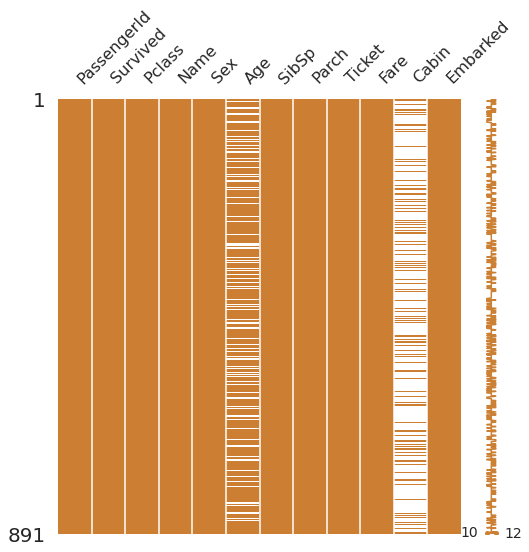

In [17]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8),color=(0.8, 0.5, 0.2))

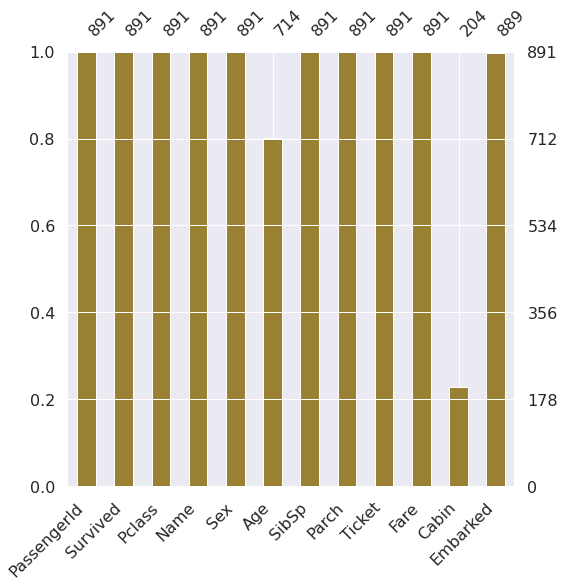

In [18]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.6, 0.5, 0.2))

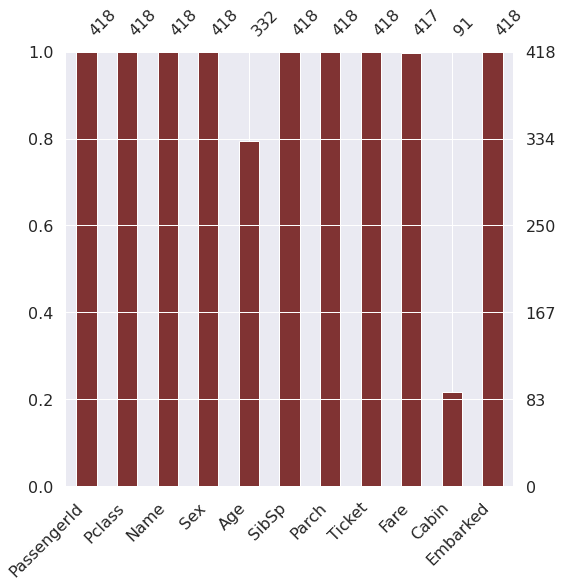

In [19]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.5, 0.2, 0.2))

## 1.2 Target label 확인

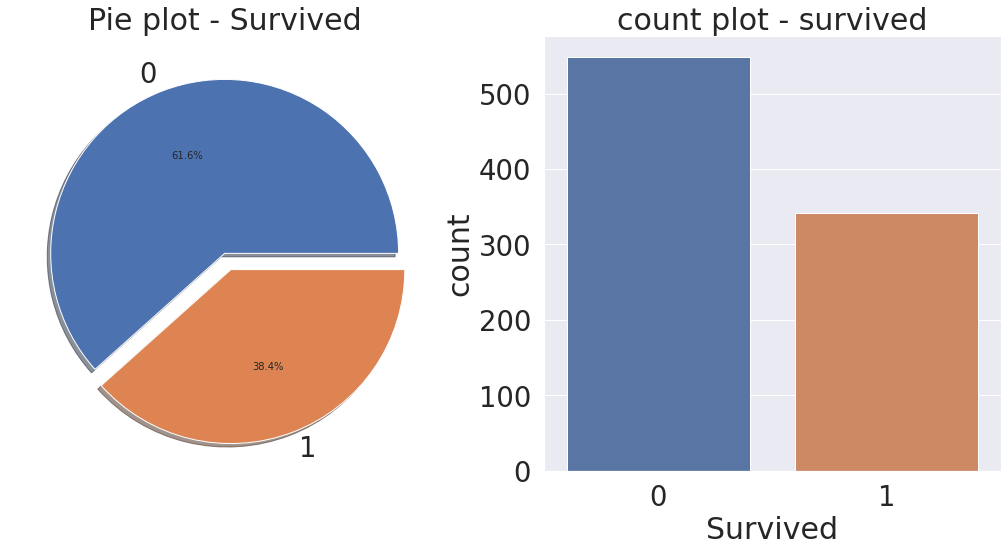

In [20]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('count plot - survived')

plt.show();

# (2) EDA

## 2.1 Pclass

- 순서가 있는 데이터 타입
- pivot 메소드, pandas의 groupby로 작업 가능

In [21]:
df_train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [22]:
# 생존한 사람의 총합
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [24]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


grouped 객체에 mean() 하면 클래스별 생존률을 얻을 수 있다.

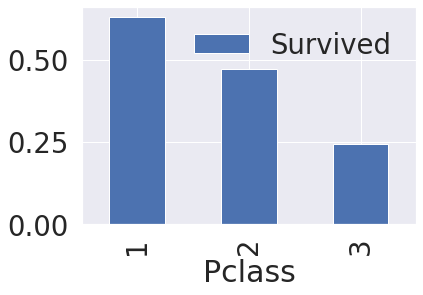

In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Pclass와 생존률 과의 관계를 확인할 수 있었음

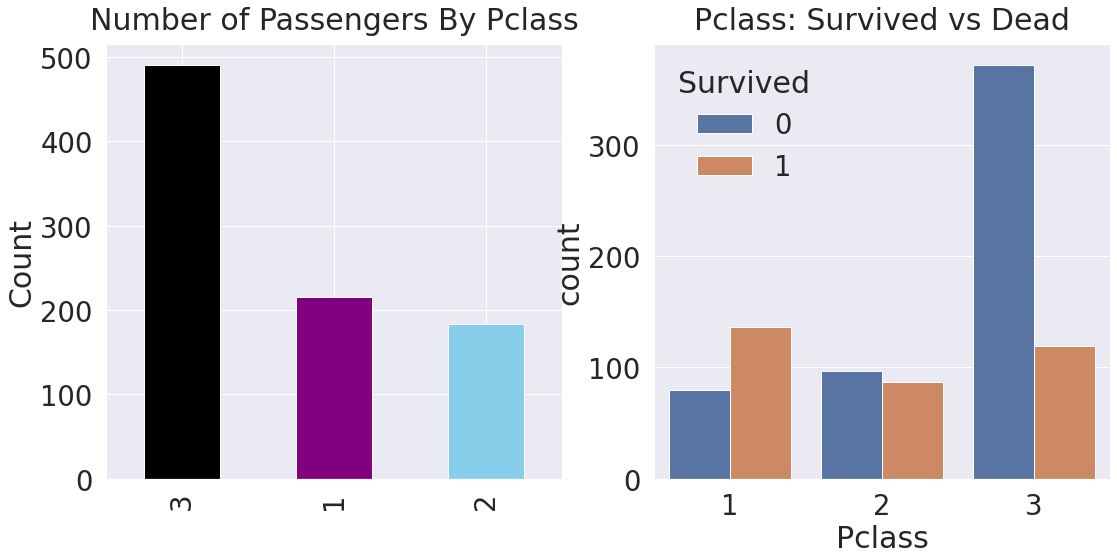

In [26]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['black', 'purple', 'skyblue'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y= y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

모델을 새울 때 Pclass를 사용하는 것이 좋을 것이라 판단

## 2.2 Sex

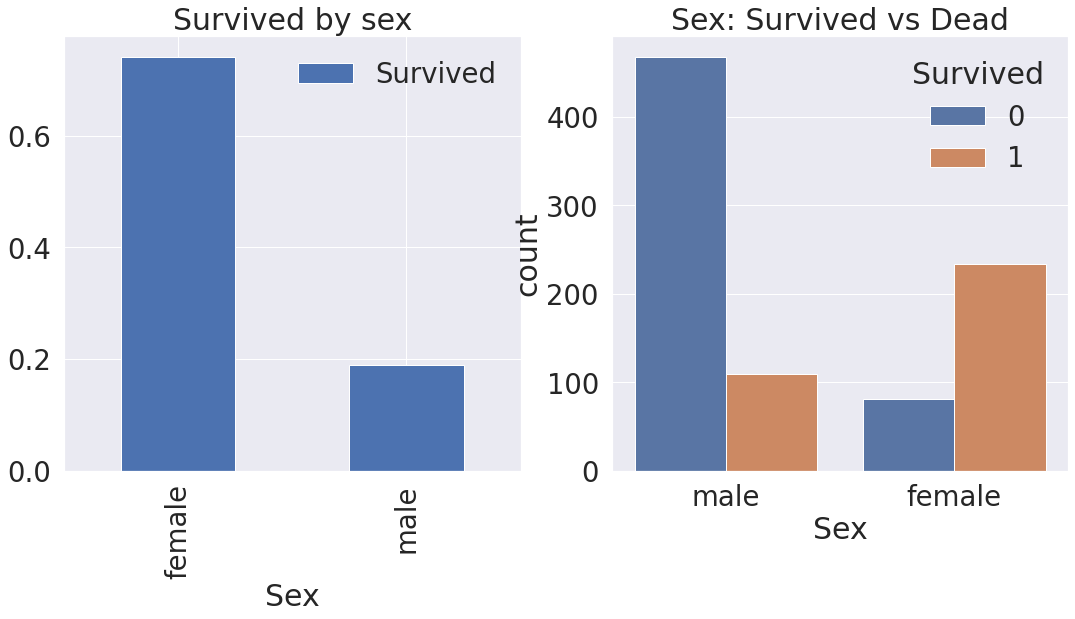

In [27]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived by sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [28]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass
- sex 특징값이 생존에 영향을 준다는 것을 알게 되었음
- 그러면 앞서 비교한 Pclass와는 어떨까?

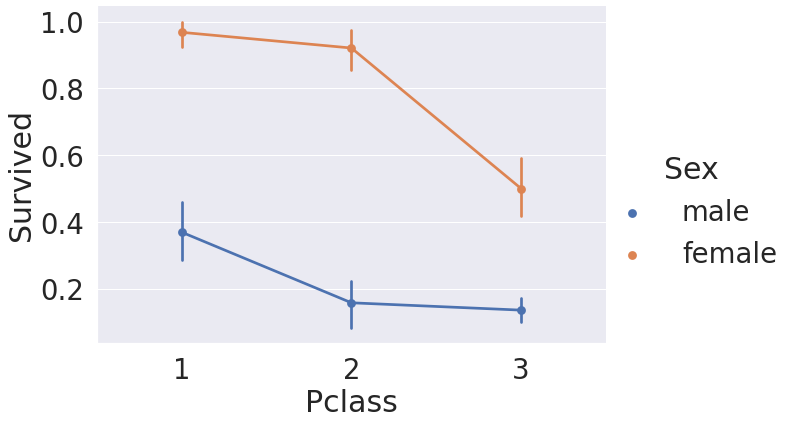

In [30]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

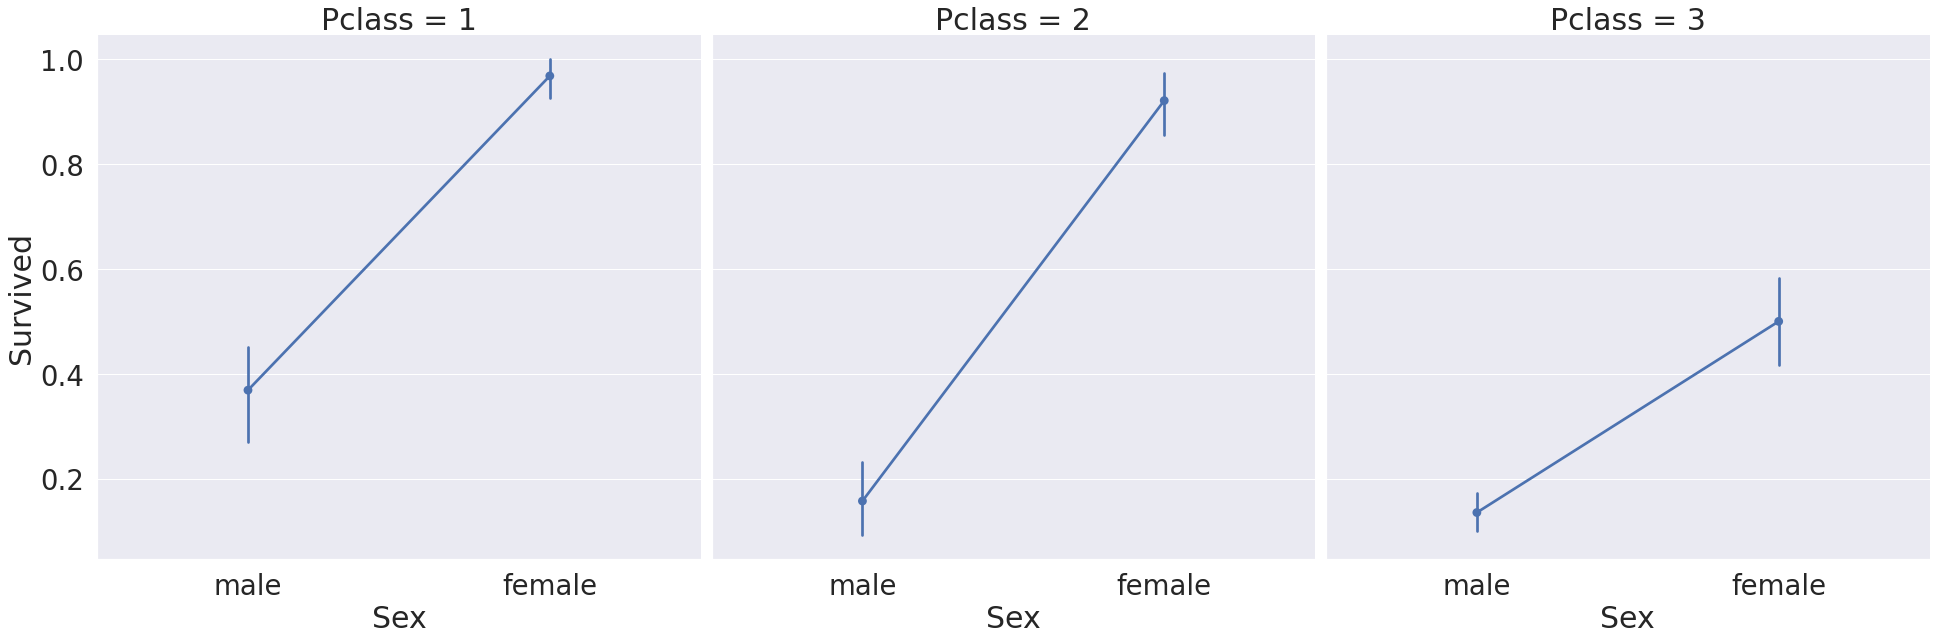

In [31]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, b =.5, size=9, aspect=1)

- 모든 클래스에서 성별에 대해 일관적인 결과가 나오고 있음

## 2.4 Age

In [32]:
print('제일 어린 승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('나이 제일 많은 승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 어린 승객 : 80.0 Years
나이 제일 많은 승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


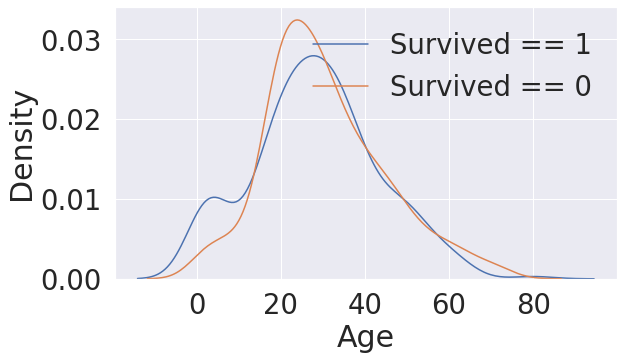

In [33]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax =ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

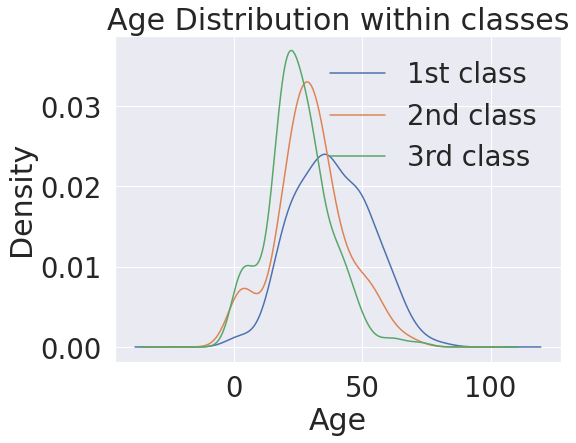

In [34]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class']);

- 클래스에 따라 나이의 상관관계를 찾을 수 있었음

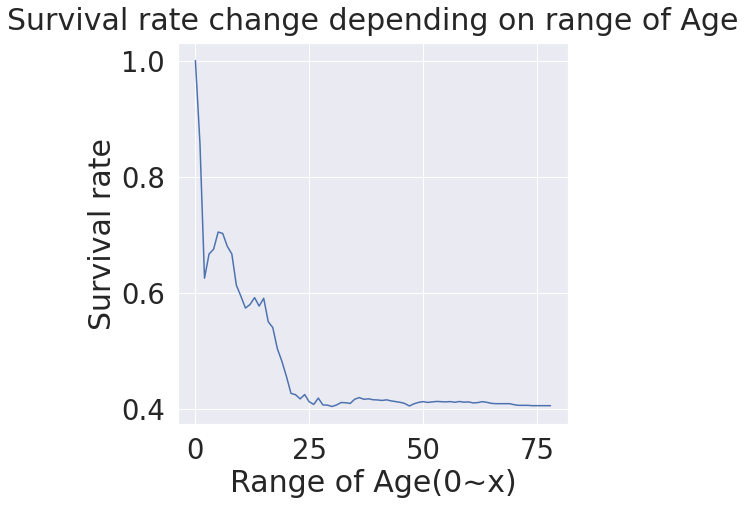

In [35]:
cummulate_survival_ratio=[]
for i in range(1, 80) :
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존 확률이 올라감
- Age 또한 특징으로 사용할 수 있을 것임

## 2.5 Pclass, Sex, Age
- x : case(Pclass, Sex)
- y : distribution(Age)

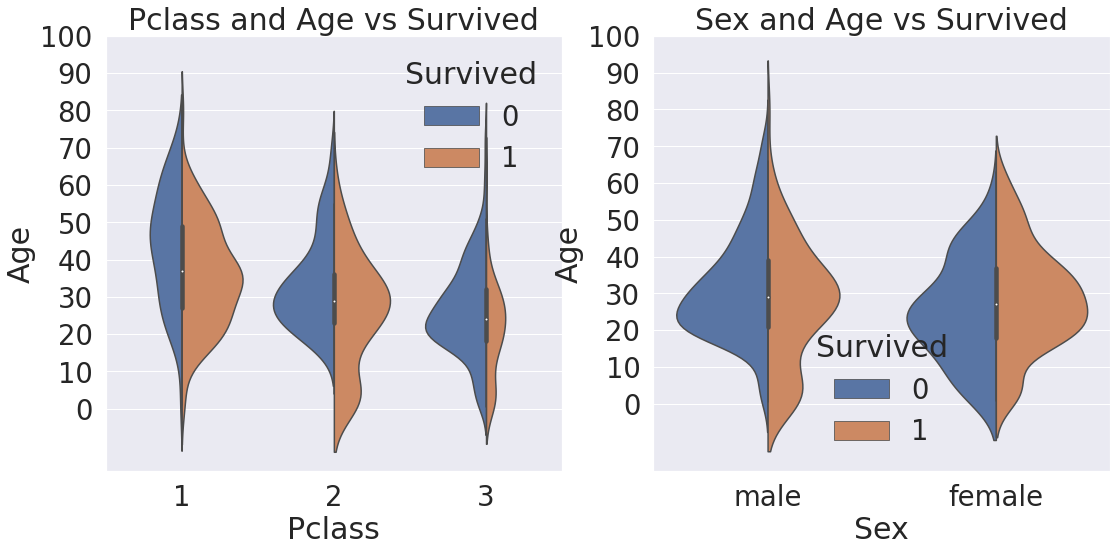

In [36]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train, sclae='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 2.6 Embarked
- 탑승 항구

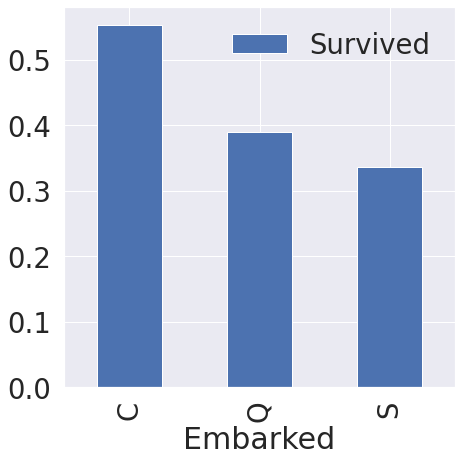

In [37]:
d, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'],as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 의미가 있을지는 모르겠지만 약간의 차이가 있기 때문에 사용하기로 함

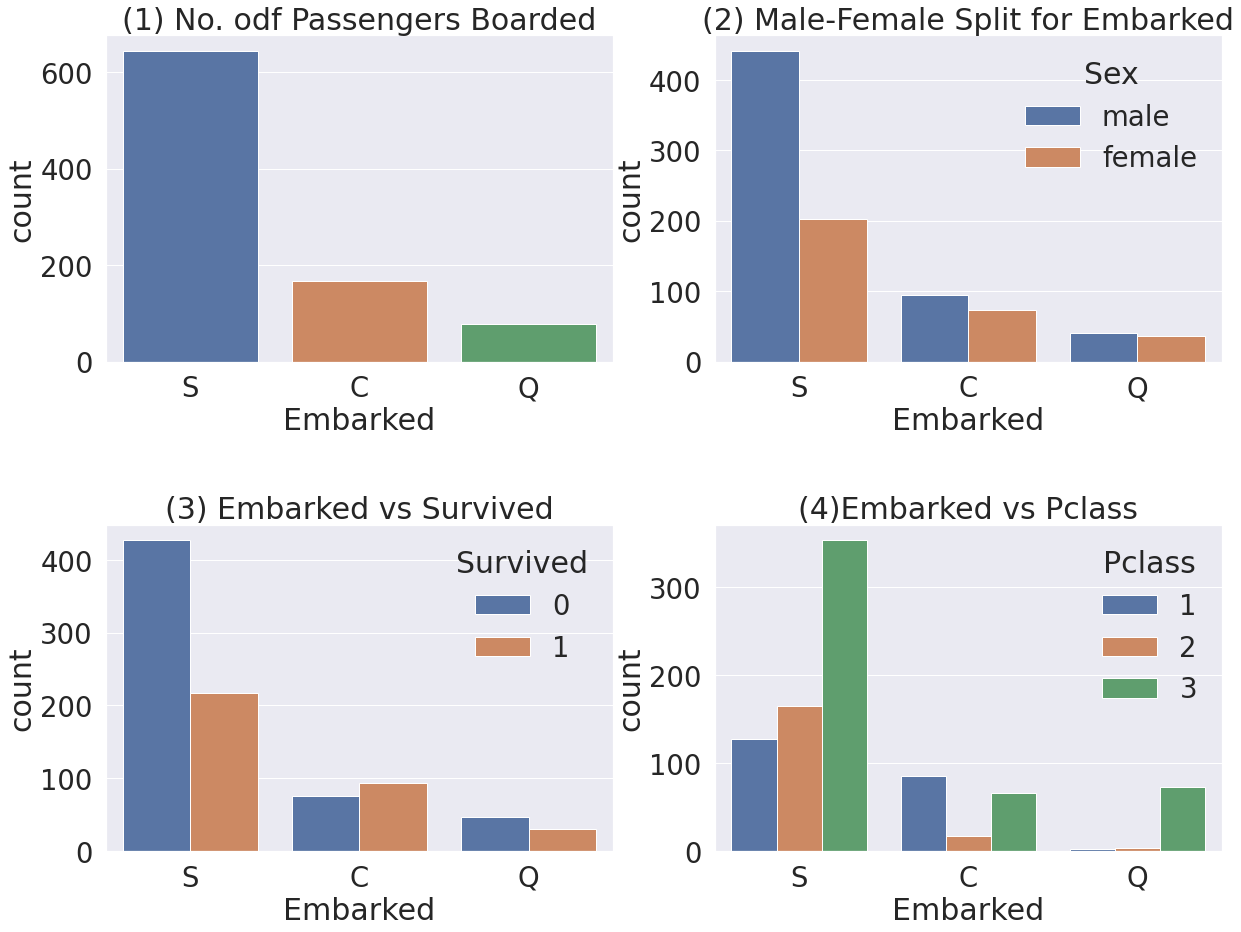

In [38]:
f,ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax =ax[0,0])
ax[0,0].set_title('(1) No. odf Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax = ax[1,1])
ax[1,1].set_title('(4)Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [39]:
df_train['FamilySize'] = df_train['SibSp']+ df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp']+ df_test['Parch'] + 1

In [40]:
print("Maximun size of Family: ", df_train['FamilySize'].max())
print("Maximun size of Family: ", df_train['FamilySize'].min())

Maximun size of Family:  11
Maximun size of Family:  1


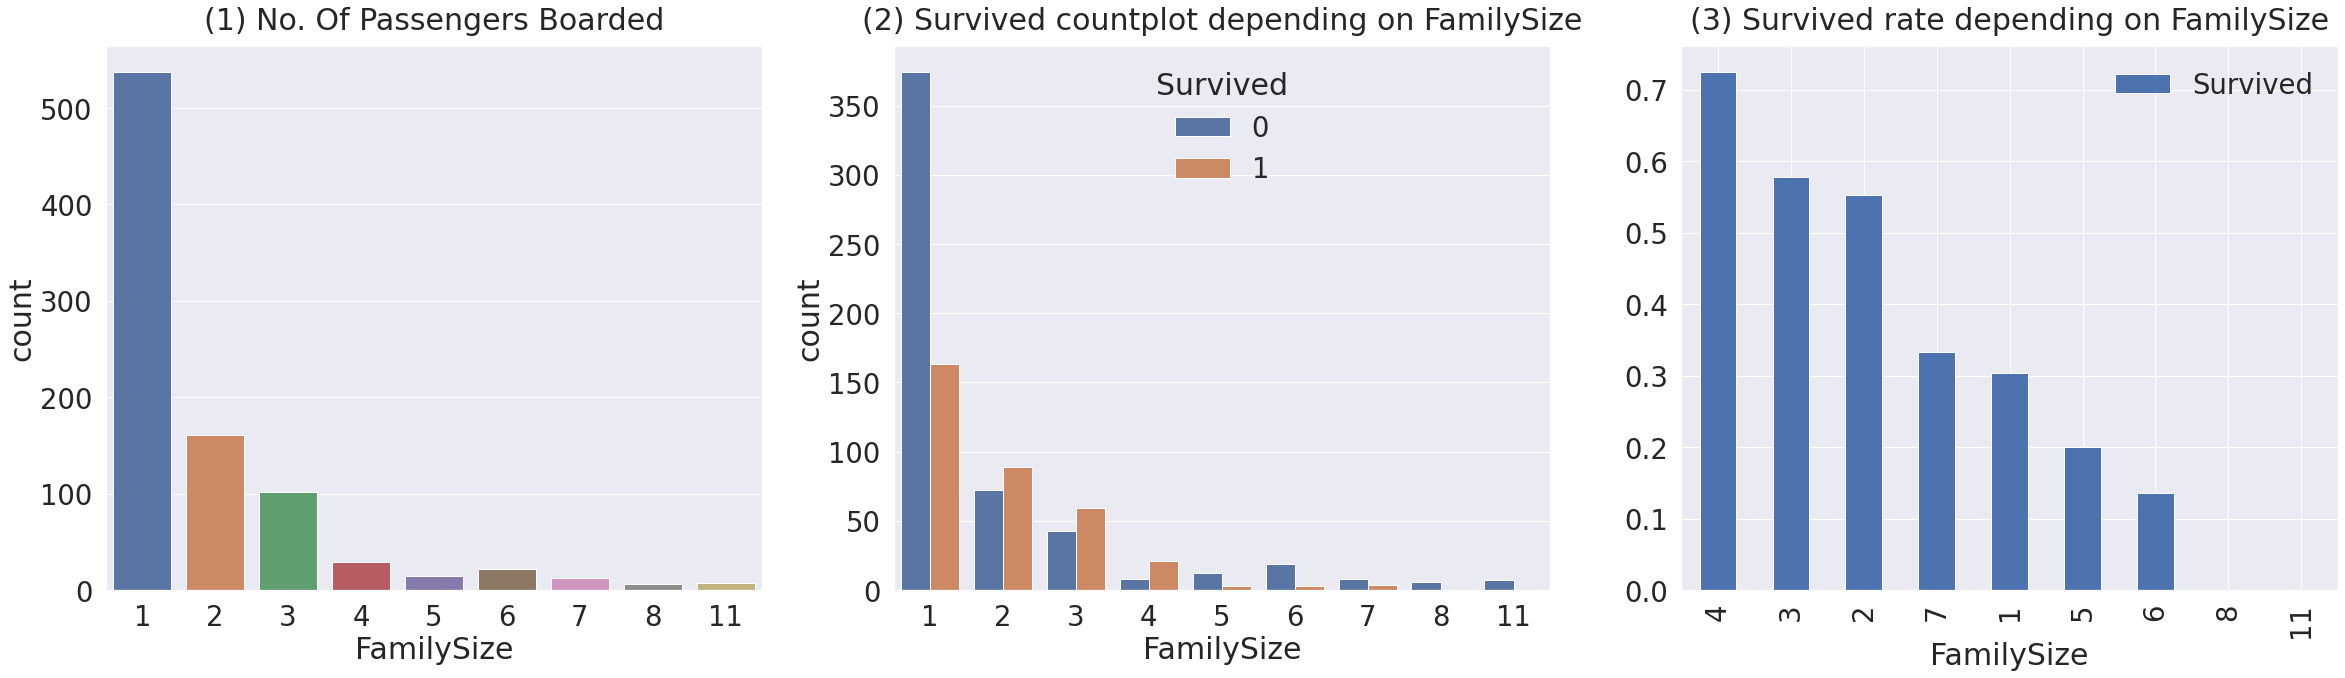

In [41]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.8 Fare
- 탑승요금이며 continous feature

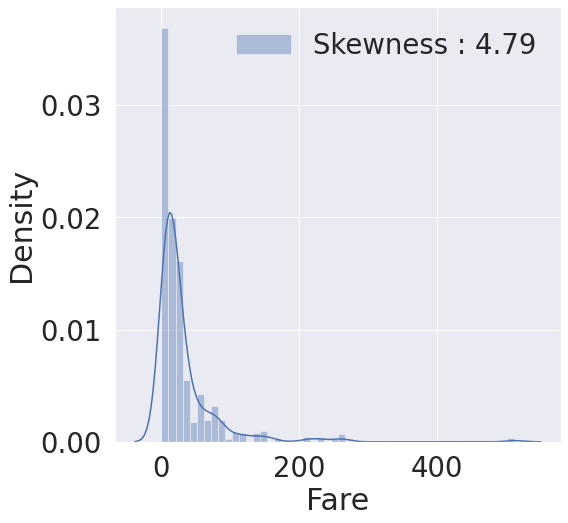

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 분포도가 비대칭
- outlier의 영향을 줄이기 위해 Fare에 log화

In [43]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # null 값들을 test의 평균값으로 채워 넣기

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

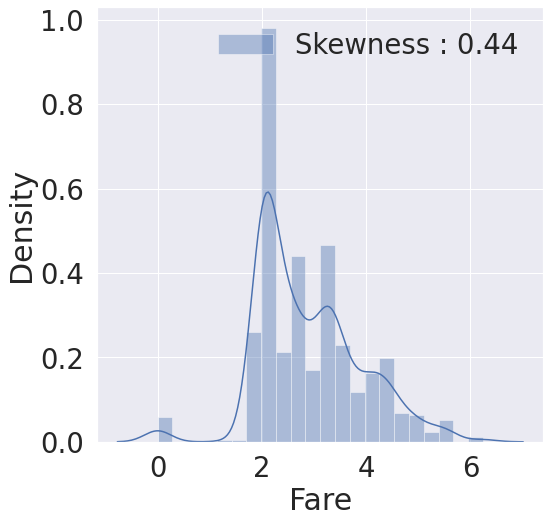

In [44]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

## 2.9 Cabin
- NaN이 대략 80%이므로 생존에 필요한 영향 찾기 힘들기 떄문에 무시

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket
- 새로운 feature를 추가 및 기존의 feature에 여러 조작을 가하는 feature engineering
- 잘 이용하면 쓸모있는 값으로 이용할 수 있을 거 같음.. 이 부분에 대한 고민이 케글 공부의 시작이라고 생각하면 된다.

In [46]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# (3) fature engineering
- dataset의 null 값 부터 채우자.. null 값을 포함하는 feature의 통계학을 참고하거나 아이디어를 내면 된다.
- null 값 채우는 것이 모델의 성능을 좌지우지 

## 3.1 Fill Null

### 3.1.1 Fill Null in Age using title
- 이를 이용해 pandas series의 Str 함수와 정규표현식을 이용해 title로 Age의 null 값을 채워보기로 하였음

In [47]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # ex) Mr.
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [48]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [49]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [50]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


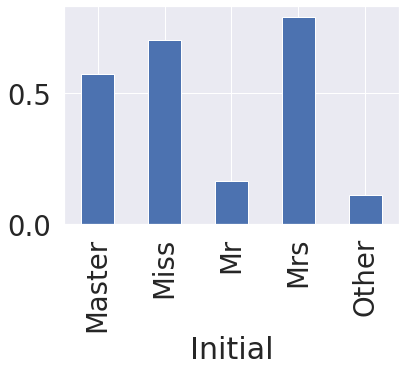

In [51]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

머신러닝을 이용하거나 통계학을 이용해 null값을 채운다.

In [52]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [53]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [54]:
print('Embarked has ', sum(df_train['Embarked'].isnull()))

Embarked has  2


S에서 가장 많은 탑승객이 있었으므로 null 값을 S로 채우자

In [55]:
df_train['Embarked'].fillna('S', inplace=True)

## 3.2 Change Age(continuous to categorical)

- 연속값을 카테고리화하면 일부 data 유실 주의
- 1) loc 2) apply로 함수 주입 2가지 방법 있고 loc자주 사용함

In [56]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [57]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

둘 다 같은 방법, 한 번 확인해보자

In [58]:
print((df_train['Age_cat'] == df_train['Age_cat_2']).all())

True


In [59]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 3.3 Chage Initial, Embarked and Set(String to numerical)
- 카테고리화 되어 있는 String 값은 수치화 시켜야 함

In [60]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [61]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [62]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q':1, 'S':2})

In [64]:
df_train['Embarked'].isnull().any() # 하나라도 null값이면 true

False

In [65]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

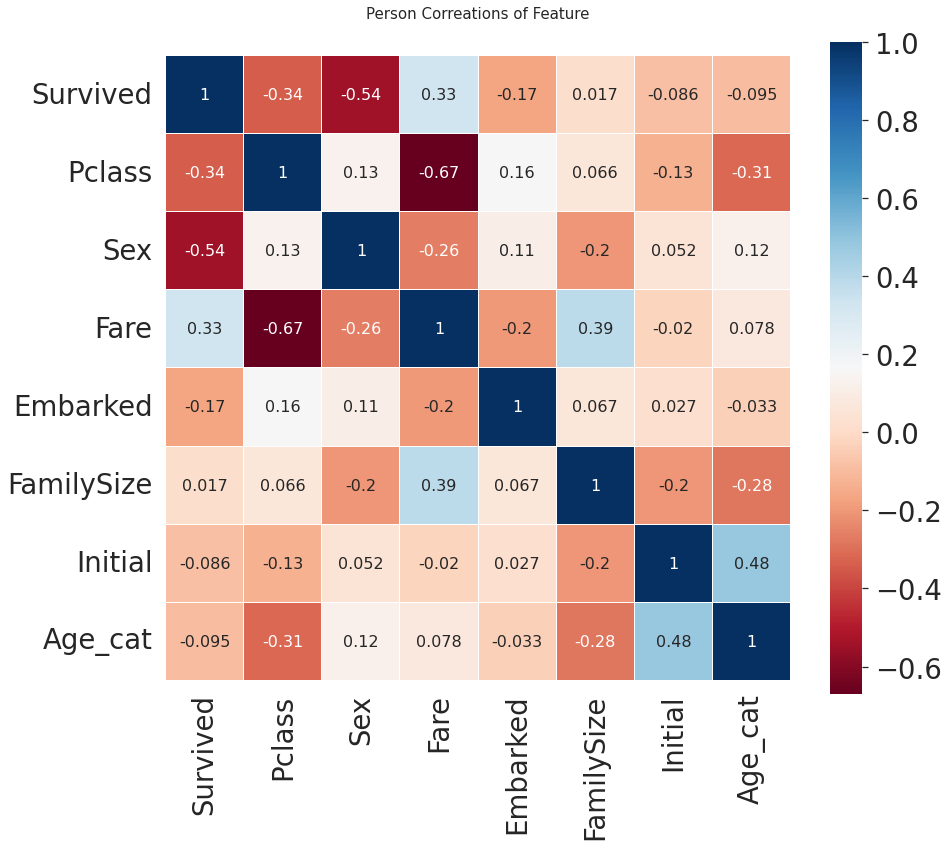

In [66]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Person Correations of Feature', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

- 서로 강한 상관관계를 가지고 있는 feature 들이 없다 = 불필요한 feature가 없다 
- 이것을 확인했으니 데이터 전처리 data preprocessing 함 해보자

## 3.4 One-hot encoding on Initial and Embarked
- 수치화 시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델 성능을 높이기 위해 사용

In [67]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [68]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [69]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


# (4) Building MachineLearning Model and prediction using the trained model

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델의 평가
from sklearn.model_selection import train_test_split

## 4.1 Preparation - Split datast into train, valid, test set
- 학습에 쓰일 데이터와 target label(Survived)를 drop을 이용해 분리

In [71]:
x_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [72]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, target_label, test_size=0.3, random_state=2018)

모델을 잘 사용하기 위한 파라미터 튜닝이라는 작업도 있으나 스킵

## 4.2 Model generation and prediction

In [73]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_valid)

In [74]:
print('총 {}명 중 {:.2f}%정확도로 생존을 맞춤'.format(y_valid.shape[0], 100*metrics.accuracy_score(prediction, y_valid)))

총 268명 중 82.09%정확도로 생존을 맞춤


## 4.3 Feature importance
- 모델이 학습하는데 각각의 feature가 얼마나 영향을 미치는지에 대한 가중치 표현 = feature importance

In [75]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

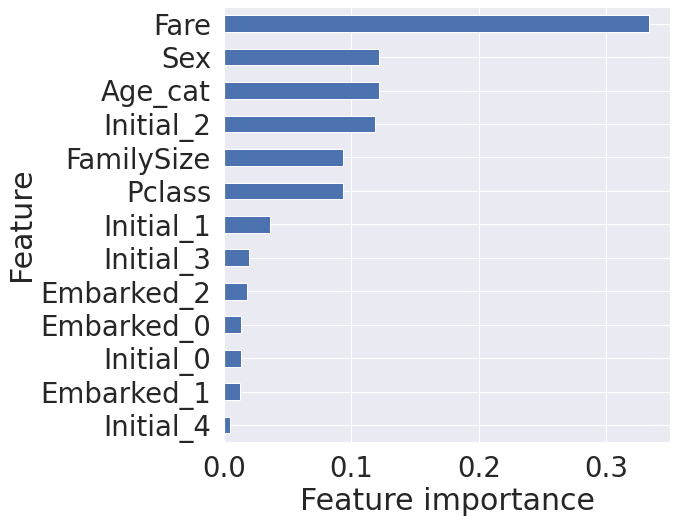

In [76]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

Fare가 가장 영향력이 크지만, 모델에 따라/특징 engineering에 따라 결과가 또 달라지기는 함

## 4.4 Prediciton on Test set

In [77]:
submission = pd.read_csv('gender_submission.csv')
# submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [78]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [79]:
prediction = model.predict(x_test)
submission['Survived'] = prediction

In [81]:
#submission.to_csv('my_first_submission.csv', index=False)